## First, Lets Find 2023 Data ##

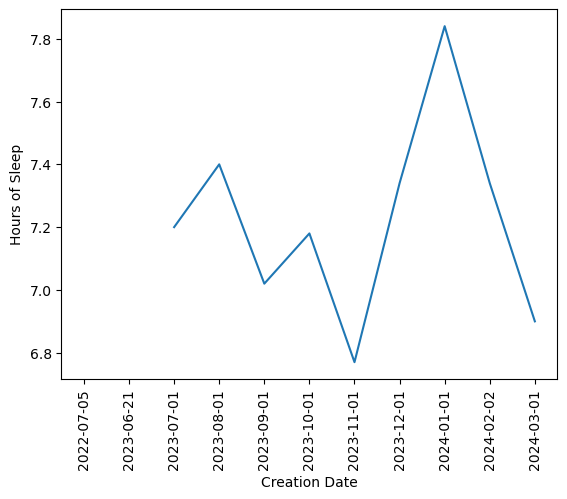

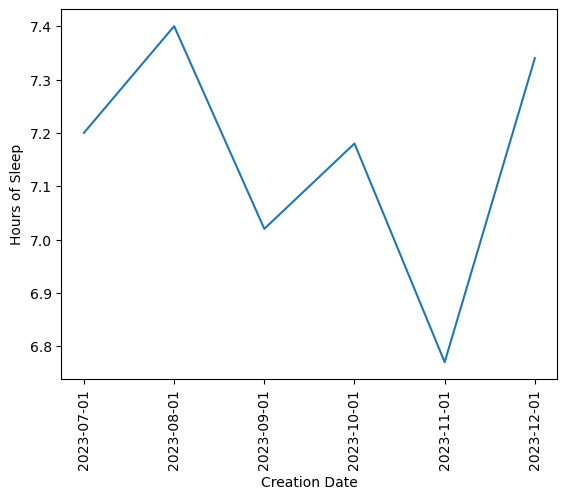

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# ACCESSING SLEEP DATA AND ENSURE IT IS PLOTTABLE

data1 = pd.read_csv("Sleep Profile.csv")

plt.plot(data1["creation_date"], data1["sleep_duration"]);
plt.xticks(rotation="vertical");
plt.xlabel("Creation Date");
plt.ylabel("Hours of Sleep");
plt.show()

new_data = data1.iloc[0:8]
new_data = new_data.dropna()
sleep_data = new_data.drop(new_data.index[0])

plt.plot(sleep_data["creation_date"], sleep_data["sleep_duration"]);
plt.xticks(rotation="vertical");
plt.xlabel("Creation Date");
plt.ylabel("Hours of Sleep");
plt.show()

In [2]:
sleep_data.head()

,creation_date,sleep_type,deep_sleep,rem_sleep,sleep_duration,sleep_start_time,schedule_variability,restorative_sleep,time_before_sound_sleep,sleep_stability,nights_with_long_awakenings,days_with_naps
2,2023-07-01,Tortoise,73.67,16.03,7.20,24.29,83.12,77.04,42.83,4.75,11.11,0.00
3,2023-08-01,Parrot,90.32,17.41,7.40,23.91,58.56,80.82,22.26,4.83,9.68,3.23
4,2023-09-01,Parrot,84.89,15.84,7.02,23.89,97.90,75.37,22.70,4.38,10.00,3.33
5,2023-10-01,Parrot,84.77,14.63,7.18,23.58,64.86,76.12,26.07,4.52,10.34,0.00
6,2023-11-01,Parrot,79.30,14.54,6.77,24.12,115.71,80.53,36.53,4.64,3.33,3.33


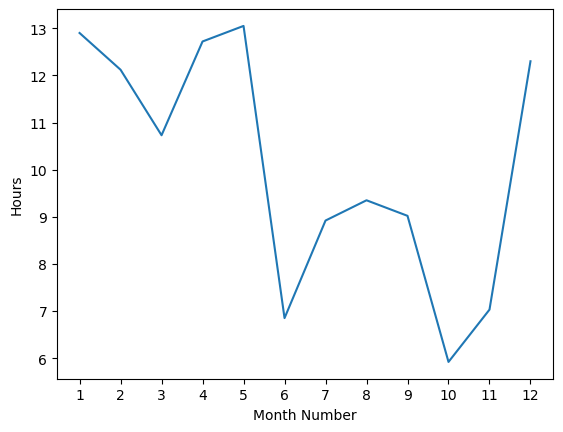

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# PURPOSE - ITERATE THROUGH ALL THE EXERCISE ZONE FILES AND COMBILE A DICTIONARY WITH THE KEY BEING EACH MONTH OF 2023 AND
# THE VALUE BEING THE TOTAL AMOUNT OF HOURS PER MONTH RECORDED FOR PHYSICAL ACTIVITY.

data = pd.read_csv("Active Zone Minutes - 2023-01-01.csv")

# INITIALIZING VARIABLES
HR_zone = 0
mth_num = 1
year = "2023"
zone_per_month_23 = {}

#OUTER WORK - COMPILING MULTIPLE DATA FILES (1-9)
for i in range(9):
        
    data = pd.read_csv("Active Zone Minutes - 2023-0" + str(mth_num) + "-01.csv")

    # INNER WORK - COMPILING ONE MONTH OF DATA.
    for date in data.iloc[:,0]:

        date_0 = date[0:7]

        if date_0 == year + "-" + "0" + str(mth_num):
            HR_zone += 1

    HR_zone = str(HR_zone)
    year = str(year)
    zone_per_hour = round(int(HR_zone) / 60, 2)
    zone_per_month_23[str(mth_num)] = zone_per_hour
    HR_zone = 0
    mth_num += 1  
    
#OUTER WORK P2 - COMPILING MULTIPLE DATA FILES (10-12)
for i in range(10,13):
        
    data = pd.read_csv("Active Zone Minutes - 2023-" + str(mth_num) + "-01.csv")

    # INNER WORK - COMPILING ONE MONTH OF DATA.
    for date in data.iloc[:,0]:

        date_0 = date[0:7]

        if date_0 == year + "-" + str(mth_num):
            HR_zone += 1

    HR_zone = str(HR_zone)
    year = str(year)
    zone_per_hour = round(int(HR_zone) / 60, 2)
    zone_per_month_23[str(mth_num)] = zone_per_hour
    HR_zone = 0
    mth_num += 1  

# NOW PLOTS
plt.plot(zone_per_month_23.keys(), zone_per_month_23.values());
plt.xlabel("Month Number");
plt.ylabel("Hours");

## Lets Combine The Plots ##

In [4]:
# NECESSARY CONVERSIONS

lst = list(zone_per_month_23.keys())
months = lst[6:13]

lst = list(zone_per_month_23.values())
z_hours = lst[6:13]

lst = list(sleep_data["sleep_duration"])
s_hours = lst

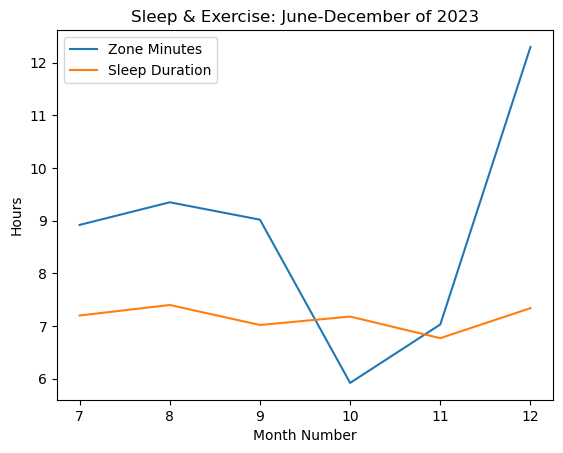

In [5]:
# PLOTTING THE DATA TOGETHER

plt.plot(months, z_hours, label = "Zone Minutes");
plt.plot(months, s_hours, label = "Sleep Duration");
plt.legend()
plt.xlabel("Month Number");
plt.ylabel("Hours");
plt.title("Sleep & Exercise: June-December of 2023")
plt.show()


## Statistical Measures ##

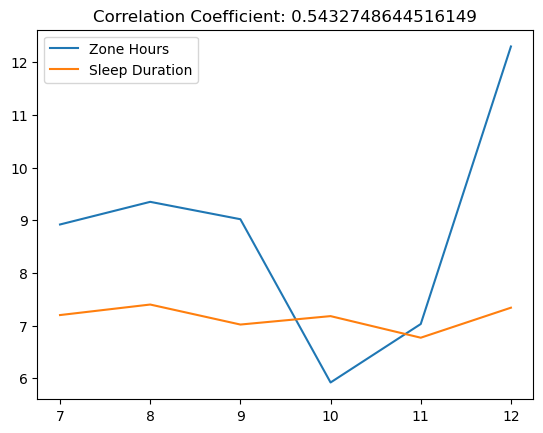

In [6]:
# FINDING A CORRELATION IN THE MONTHS JUNE-DECEMBER OF 2023

corr_coef = np.corrcoef(z_hours, s_hours)[0, 1]

# Plot the data
plt.plot(months, z_hours, label='Zone Hours')
plt.plot(months, s_hours, label='Sleep Duration')
plt.legend()
plt.title(f'Correlation Coefficient: {corr_coef}')
plt.show()

In [7]:
# CHAT GPT SOURCED

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(z_hours, s_hours)

# Print the results
print(f"T-statistic: {round(t_statistic,2)}")
print(f"P-value: {round(p_value,2)}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a statistically significant difference between the two dependent variables.")
else:
    print("Fail to reject the null hypothesis - No statistically significant difference between the two dependent variables.")


T-statistic: 1.89
P-value: 0.12
Fail to reject the null hypothesis - No statistically significant difference between the two dependent variables.
